In [ ]:

!brew install libyaml
!pip install cython


/bin/bash: line 1: brew: command not found


In [ ]:
!pip install pyyaml==5.1


  Using cached PyYAML-5.1.tar.gz (274 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip install --upgrade pip setuptools wheel


In [ ]:
!pip install pyyaml==5.1

  Using cached PyYAML-5.1.tar.gz (274 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip uninstall -y cython pyyaml





Found existing installation: Cython 0.29.37
Uninstalling Cython-0.29.37:
  Successfully uninstalled Cython-0.29.37
Found existing installation: PyYAML 5.1
Uninstalling PyYAML-5.1:
  Successfully uninstalled PyYAML-5.1


In [ ]:
!pip install --upgrade "cython<3.0.0"

In [ ]:
!pip install pyyaml==6.0.1

In [ ]:
import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("Torch version:", TORCH_VERSION, "; CUDA version:", CUDA_VERSION)

Torch version: 2.5 ; CUDA version: cu124


In [ ]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-bjuex8pt
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-bjuex8pt
  Resolved https://github.com/facebookresearch/detectron2.git to commit 9604f5995cc628619f0e4fd913453b4d7d61db3f
  Preparing metadata (setup.py) ... done


In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
!curl -L "https://universe.roboflow.com/ds/HetgI9Ydr6?key=m47goCIeLW" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   2462      0 --:--:-- --:--:-- --:--:--  2468
100 30.1M  100 30.1M    0     0  8241k      0  0:00:03  0:00:03 --:--:--  9.8M
Archive:  roboflow.zip
replace README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: README.dataset.txt      
replace README.roboflow.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: README.roboflow.txt     
replace test/010183_jpg.rf.8551bd901faa1748fe4ccfe74367858f.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: test/010183_jpg.rf.8551bd901faa1748fe4ccfe74367858f.jpg  
replace test/087265_jpg.rf.0dd8e8c8d43544f782702f4798986d07.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: test/087265_jpg.rf.0dd8e8c8d43544f782702f4798986d07.jpg  
replace test/098682_jpg.rf.5b1b2b3e4ac93a90e434cbb567c3b3f1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]

In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_dataset_train", {}, "/content/train/_annotations.coco.json", "/content/train")
register_coco_instances("my_dataset_test", {}, "/content/test/_annotations.coco.json", "/content/test")

WARNING [01/31 10:29:33 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[01/31 10:29:33 d2.data.datasets.coco]: Loaded 810 images in COCO format from /content/train/_annotations.coco.json


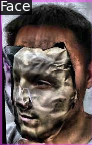

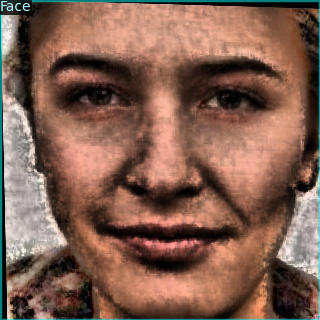

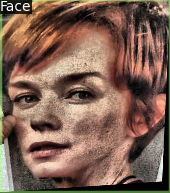

In [ ]:
my_dataset_train_metadata = MetadataCatalog.get("my_dataset_train")
dataset_dicts = DatasetCatalog.get("my_dataset_train")

import random
from detectron2.utils.visualizer import Visualizer

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=my_dataset_train_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])


In [ ]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.0025
cfg.SOLVER.MAX_ITER = 500
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 6

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[01/31 10:29:46 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[01/31 10:29:46 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.11/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[01/31 10:29:55 d2.utils.events]:  eta: 0:03:03  iter: 19  total_loss: 2.151  loss_cls: 1.812  loss_box_reg: 0.3038  loss_rpn_cls: 0.008689  loss_rpn_loc: 0.02354    time: 0.3789  last_time: 0.3636  data_time: 0.0161  last_data_time: 0.0120   lr: 9.7405e-05  max_mem: 2342M
[01/31 10:30:06 d2.utils.events]:  eta: 0:02:59  iter: 39  total_loss: 0.7586  loss_cls: 0.3594  loss_box_reg: 0.3344  loss_rpn_cls: 0.00241  loss_rpn_loc: 0.01513    time: 0.3864  last_time: 0.2540  data_time: 0.0122  last_data_time: 0.0051   lr: 0.00019731  max_mem: 2425M
[01/31 10:30:14 d2.utils.events]:  eta: 0:02:52  iter: 59  total_loss: 0.4841  loss_cls: 0.1427  loss_box_reg: 0.3037  loss_rpn_cls: 0.002302  loss_rpn_loc: 0.02488    time: 0.3862  last_time: 0.3229  data_time: 0.0084  last_data_time: 0.0029   lr: 0.0002972  max_mem: 2480M
[01/31 10:30:22 d2.utils.events]:  eta: 0:02:45  iter: 79  total_loss: 0.3326  loss_cls: 0.06697  loss_box_reg: 0.2269  loss_rpn_cls: 0.001293  loss_rpn_loc: 0.01686    time: 0

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.DATASETS.TEST = ("my_dataset_test", )
predictor = DefaultPredictor(cfg)

[01/31 10:33:27 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


/usr/local/lib/python3.11/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

In [ ]:
test_metadata = MetadataCatalog.get("my_dataset_test")


In [ ]:
from detectron2.utils.visualizer import ColorMode
import glob

for imageName in glob.glob('/content/test/*jpg'):
  im = cv2.imread(imageName)
  outputs = predictor(im)
  v = Visualizer(im[:,:,::-1], metadata=test_metadata, scale=0.8)
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(out.get_image()[:, :, ::-1])

Output hidden; open in https://colab.research.google.com to view.

In [13]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("my_dataset_test", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "my_dataset_test")
print(inference_on_dataset(predictor.model, val_loader, evaluator))

WARNING [01/31 10:39:28 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[01/31 10:39:28 d2.data.datasets.coco]: Loaded 28 images in COCO format from /content/test/_annotations.coco.json
[01/31 10:39:28 d2.data.build]: Distribution of instances among all 2 categories:
|  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|
|    aaa     | 0            |    Face    | 28           |
|            |              |            |              |
|   total    | 28           |            |              |
[01/31 10:39:28 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[01/31 10:39:28 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[01/31 10:39:28 d2.data.common]: Serializing 28 elements to byte tensors and co

In [14]:
f = open('config.yml', 'w')
f.write(cfg.dump())
f.close()

In [18]:
from google.colab import files


files.download("output/model_final.pth")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
from google.colab import drive
drive.mount('/content/drive')
!cp output/model_final.pth /content/drive/MyDrive/


Mounted at /content/drive
